In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Задача 1

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

In [10]:
# Сначала подробный разбор на 1 сочетании, затем в функции просмотр всех сочетаний 

a = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]
b = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

X = pd.DataFrame(a)
Y = pd.DataFrame(b)

X

,0,1,2,3
0,1.224013,2.308685,3.036364,2.692872
1,-0.187573,1.303374,5.120930,3.463632
2,-0.810945,1.824634,5.796865,1.861594
3,0.751290,2.673921,3.655298,1.667461
4,0.009724,1.973673,2.505943,1.697552
5,-0.629726,0.777508,2.841240,4.544106
6,2.295362,1.812067,1.950262,1.518746
7,0.092042,2.269714,7.477087,2.610812
8,2.392528,3.175640,3.614206,5.107734
9,0.549838,2.879887,1.657528,1.596360


In [11]:
ones = np.ones((X.shape[0], 1))
ones
X12 = pd.DataFrame(ones)
X12[1] = X[0]
X12[2] = X[1]
X12

,0,1,2
0,1.0,1.224013,2.308685
1,1.0,-0.187573,1.303374
2,1.0,-0.810945,1.824634
3,1.0,0.751290,2.673921
4,1.0,0.009724,1.973673
5,1.0,-0.629726,0.777508
6,1.0,2.295362,1.812067
7,1.0,0.092042,2.269714
8,1.0,2.392528,3.175640
9,1.0,0.549838,2.879887


In [12]:
X12_T = X12.T.dot(X12)
X12_T
np.linalg.det(X12_T)   # определитель не равен 0

349.7782033818847

In [13]:
X12_inv = np.linalg.inv(X12_T)

b = X12_inv.dot(X12.T).dot(Y)

print(b)  # модель регрессии имеет вид  y=6.70781579 + 0.40786841]x1 + 1.03360247x2

[[6.70781579]
 [0.40786841]
 [1.03360247]]


In [14]:
Z12 = X12.dot(b)
e2 = Y - Z12

e2.mean()    # средняя ошибка модели равна  0

0    2.042810e-15
dtype: float64

In [15]:
R2 = 1 - (((e2-e2.mean())**2).sum()/((Y-Y.mean())**2).sum())
R2[0]   # Коэффициент детерминации 0.181136 , т.е. 18% дисперсии переменной Y учитывается или объясняется моделью. 

0.18113594742585215

In [16]:
n = X12.shape[0]
m = 2

k1 = m
k2 = n - m - 1

alpha = 0.05    # уровень значимости

t = stats.f.ppf(1 - alpha, k1, k2)
t    # критическая область: Ω𝛼 = (4.74,∞)

F = (R2[0] / k1) / ((1 - R2[0]) / k2)
F    # 0.77 Статистика не попала в критическую область, уравнение регрессии признаётся незначимым.

0.7742137586789185

In [17]:
def regress (X, Y):
    X_T = X.T.dot(X)
    print('определитель: ', np.linalg.det(X_T))   # определитель не равен 0
    X_inv = np.linalg.inv(X_T)
    b = X_inv.dot(X.T).dot(Y)
    print(f"коэффициенты модели регресии: y={b[0]} + {b[1]}x1 + {b[2]}x2")  # модель регрессии имеет вид  y=6.70781579 + 0.40786841]x1 + 1.03360247x2
    Z = X.dot(b)
    e2 = Y - Z
    print('средняя ошибка модели равна ', e2.mean())    # средняя ошибка модели равна  0
    R2 = 1 - (((e2-e2.mean())**2).sum()/((Y-Y.mean())**2).sum())
    print(f'коэффициент детерминации: {R2[0]}') 
    n = X.shape[0]
    m = 2
    k1 = m
    k2 = n - m - 1
    alpha = 0.05    # уровень значимости
    t = stats.f.ppf(1 - alpha, k1, k2)
    print(f'критическая область от {t} до ∞')    # критическая область: Ω𝛼 = (4.74,∞)
    F = (R2[0] / k1) / ((1 - R2[0]) / k2)
    if F > t:
        print(f'F-статистика = {F}, попала в критическую область, уравнение регрессии признаётся значимым')
    else:
        print(f'F-статистика = {F}, не попала в критическую область, уравнение регрессии признаётся незначимым')


        
        
ones = np.ones((X.shape[0], 1))
ones
X12 = pd.DataFrame(ones)
X12[1] = X[0]
X12[2] = X[1]
X13 = pd.DataFrame(ones)
X13[1] = X[0]
X13[2] = X[2]
X14 = pd.DataFrame(ones)
X14[1] = X[0]
X14[2] = X[3]
X23 = pd.DataFrame(ones)
X23[1] = X[1]
X23[2] = X[2]
X24 = pd.DataFrame(ones)
X24[1] = X[1]
X24[2] = X[3]
X34 = pd.DataFrame(ones)
X34[1] = X[2]
X34[2] = X[3]


print('Вариант: 12')
regress(X12, Y)
print()
print('Вариант: 13')
regress(X13, Y)
print()
print('Вариант: 14')
regress(X14, Y)
print()
print('Вариант: 23')
regress(X23, Y)
print()
print('Вариант: 24')
regress(X24, Y)
print()
print('Вариант: 34')
regress(X34, Y)

Вариант: 12
определитель:  349.7782033818847
коэффициенты модели регресии: y=[6.70781579] + [0.40786841]x1 + [1.03360247]x2
средняя ошибка модели равна  0    2.042810e-15
dtype: float64
коэффициент детерминации: 0.18113594742585215
критическая область от 4.73741412777588 до ∞
F-статистика = 0.7742137586789185, не попала в критическую область, уравнение регрессии признаётся незначимым

Вариант: 13
определитель:  2835.3600226240965
коэффициенты модели регресии: y=[3.62455695] + [1.62531203]x1 + [1.21134979]x2
средняя ошибка модели равна  0   -2.575717e-15
dtype: float64
коэффициент детерминации: 0.7634246238793152
критическая область от 4.73741412777588 до ∞
F-статистика = 11.29443912292265, попала в критическую область, уравнение регрессии признаётся значимым

Вариант: 14
определитель:  1689.2124743606082
коэффициенты модели регресии: y=[5.70686123] + [0.68359949]x1 + [1.12650707]x2
средняя ошибка модели равна  0    8.082424e-15
dtype: float64
коэффициент детерминации: 0.453296678314407

In [18]:
print('уровень линейной зависимости целевой переменной от значений 1 и 3 признаков максимальный, уравнение регрессии признано значимым')

уровень линейной зависимости целевой переменной от значений 1 и 3 признаков максимальный, уравнение регрессии признано значимым


Задача 2

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была 
посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них 
закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

In [20]:
p = 0.95
alpha = 1-p

# Конверсия
con_A = 77 / 2509
con_B = 60 / 1465
con_AB = (77 + 60) / (2509 + 1465)
con_A, con_B, con_AB    # (0.03068951773614986, 0.040955631399317405, 0.03447408152994464)


F = con_AB / con_A    # 1.1233177994627417
F

t1 = stats.norm.ppf(alpha/2)
t2 = stats.norm.ppf(1 - alpha/2)
t1, t2            # -1.959963984540054, 1.959963984540054

# F pначение статистики не попало в критическую область, значит, гипотеза подтвердилась

1.1233177994627417

Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

Выборочное среднее:
9.0 7.500909090909093 9.0 7.50090909090909 9.0 7.5 9.0 7.500909090909091

Дисперсия:
10.0 3.7520628099173554 10.0 3.752390082644628 10.0 3.747836363636364 10.0 3.7484082644628103

Коэффициент корреляции Пирсона:
[0.81642052 1.        ] [0.81623651 1.        ] [0.81628674 1.        ] [0.81652144 1.        ]

Уравнения линейной регрессии:
y = 3.0000909090909094 + 0.5000909090909093x
y = 3.000909090909089 + 0.5000000000000001x
y = 3.002454545454544 + 0.49972727272727285x
y = 3.0017272727272735 + 0.49990909090909086x



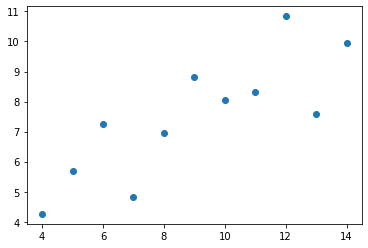

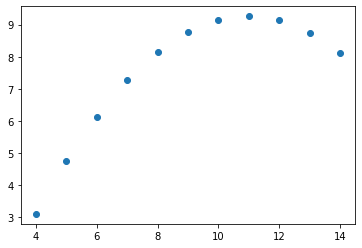

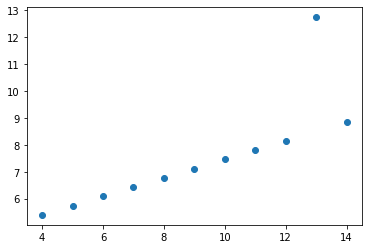

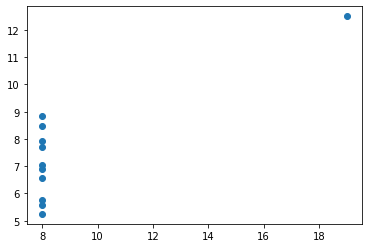

In [54]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]) 

print('Выборочное среднее:')
print(x1.mean(), y1.mean(), x2.mean(), y2.mean(), x3.mean(), y3.mean(), x4.mean(), y4.mean())
print()

print('Дисперсия:')
print(x1.var(), y1.var(), x2.var(), y2.var(), x3.var(), y3.var(), x4.var(), y4.var())
print()

print('Коэффициент корреляции Пирсона:')
print(np.corrcoef(x1, y1)[1], np.corrcoef(x2, y2)[1], np.corrcoef(x3, y3)[1], np.corrcoef(x4, y4)[1])
print()

print('Уравнения линейной регрессии:')
b11 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
b01 = y1.mean() - b11 * x1.mean()
print(f'y = {b01} + {b11}x')
b12 = np.cov(x2, y2, ddof=1)[0, 1] / np.var(x2, ddof=1)
b02 = y2.mean() - b12 * x2.mean()
print(f'y = {b02} + {b12}x')
b13 = np.cov(x3, y3, ddof=1)[0, 1] / np.var(x3, ddof=1)
b03 = y3.mean() - b13 * x3.mean()
print(f'y = {b03} + {b13}x')
b14 = np.cov(x4, y4, ddof=1)[0, 1] / np.var(x4, ddof=1)
b04 = y4.mean() - b14 * x4.mean()
print(f'y = {b04} + {b14}x')
print()

plt.scatter(x1, y1)
plt.show()
plt.scatter(x2, y2)
plt.show()
plt.scatter(x3, y3)
plt.show()
plt.scatter(x4, y4)
plt.show()